<a href="https://colab.research.google.com/github/ykato27/Basic_Visualization/blob/main/Basic_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 必要なライブラリーのインストール
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [ ]:
file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
file_name = os.path.splitext(os.path.basename(file_path))[0]
column_names = ['MPG','Cylinders', 'Displacement', 'Horsepower', 'Weight',
                  'Acceleration', 'Model Year', 'Origin'] 

In [ ]:
df = pd.read_csv(
    file_path, # ファイルパス
    names = column_names, # 列名を指定
    na_values ='?', # ?は欠損値として読み込む
    comment = '\t', # TAB以降右はスキップ 
    sep = ' ', # 空白行を区切りとする
    skipinitialspace = True, # カンマの後の空白をスキップ
    encoding = 'utf-8'
) 
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
# レコード数、カラム数の確認
df.shape

(398, 8)

In [ ]:
# 欠損値数の確認
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
# DataFrameの各列の属性を確認
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

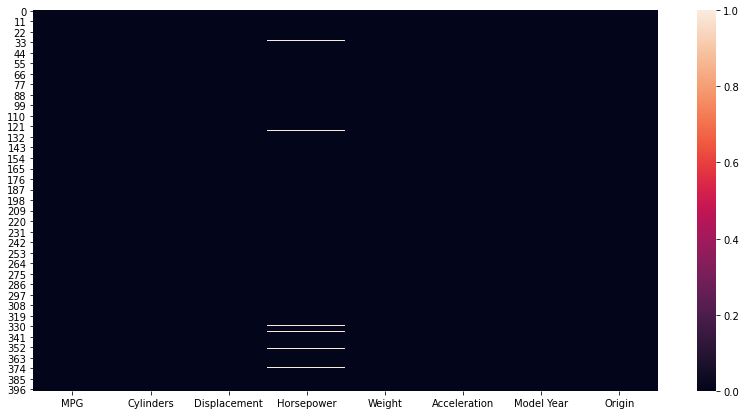

In [ ]:
# 欠損値の可視化
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull())

In [ ]:
# 要約統計量
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


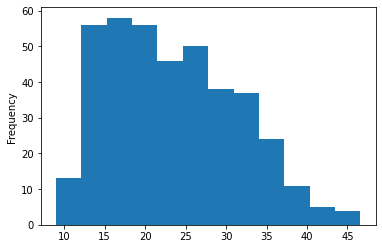

In [ ]:
# ヒストグラム
df['MPG'].plot(kind='hist', bins=12)

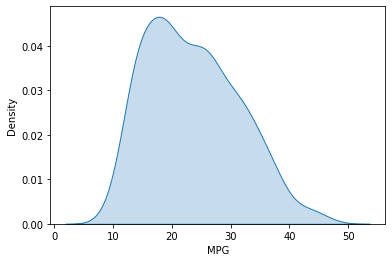

In [ ]:
# カーネル密度推定
sns.kdeplot(data=df['MPG'], shade=True)

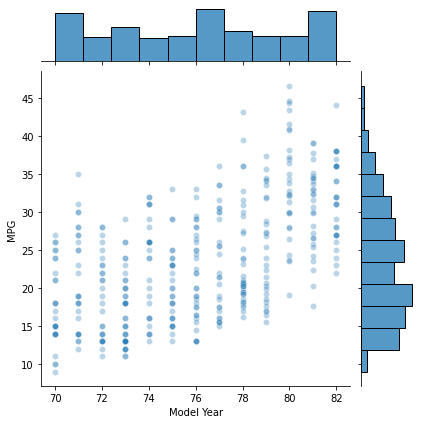

In [ ]:
#　散布図+ヒストグラム
sns.jointplot(x='Model Year', y='MPG', data=df, alpha=0.3)

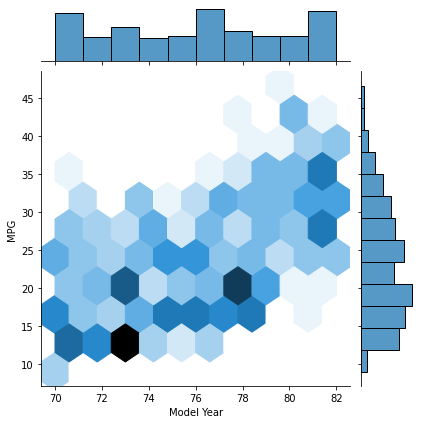

In [ ]:
#　hexagonal bins
sns.jointplot(x='Model Year', y='MPG', data=df, kind='hex')

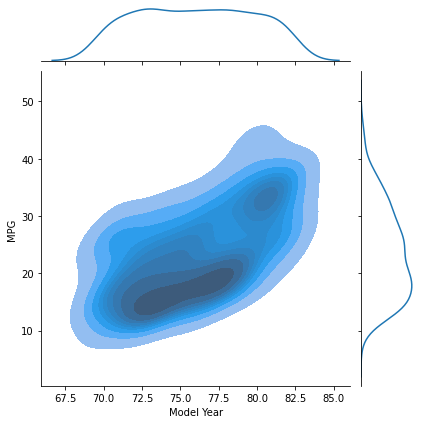

In [ ]:
# density estimates
sns.jointplot(x='Model Year', y='MPG', data=df, kind='kde', shade=True)

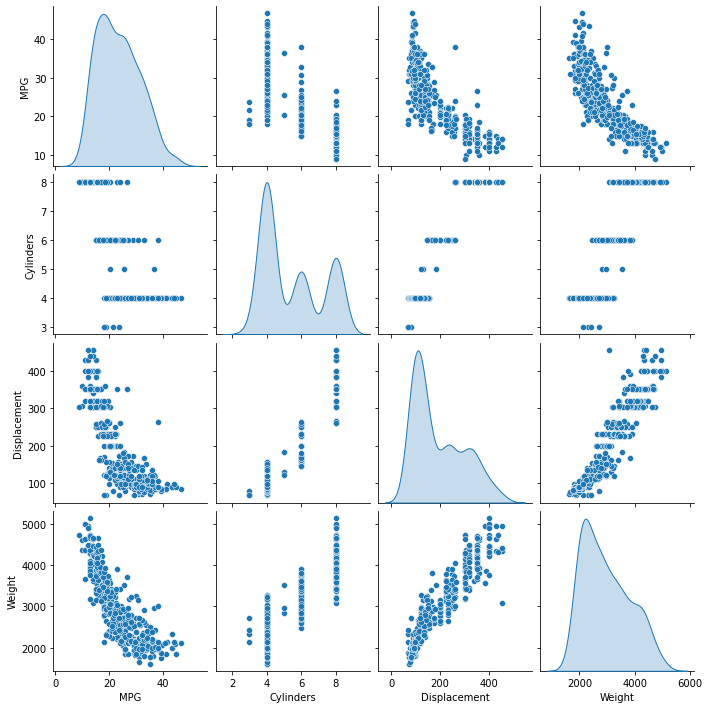

In [ ]:
# 散布図行列
sns.pairplot(df[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

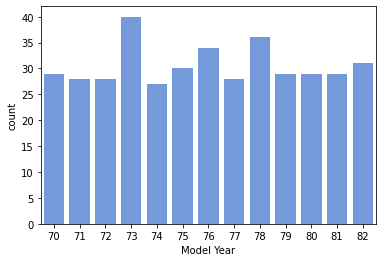

In [ ]:
# 年代別のcountplot
ax = sns.countplot(x='Model Year', data=df, color='cornflowerblue')

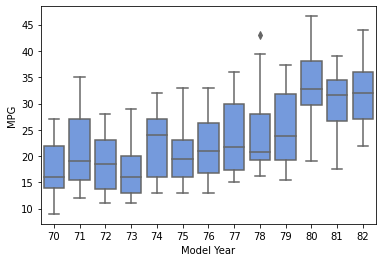

In [ ]:
# 箱ひげ図(boxplot)
sns.boxplot(x='Model Year', y='MPG', data=df.sort_values('Model Year'), color='cornflowerblue')

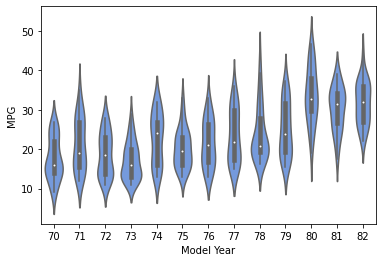

In [ ]:
# violin plot 
sns.violinplot(x='Model Year', y='MPG', data=df.sort_values('Model Year'), color='cornflowerblue')

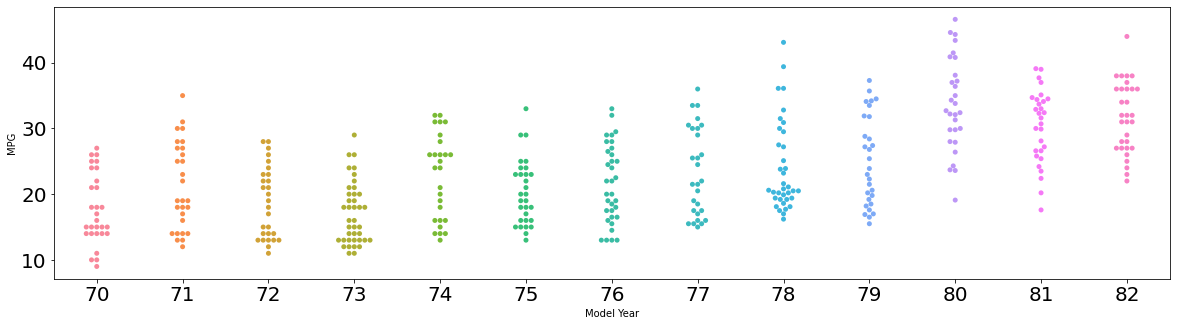

In [ ]:
# swarm plot
fig, ax = plt.subplots(figsize=(20, 5))
ax.tick_params(labelsize=20)
sns.swarmplot(x='Model Year', y='MPG', data=df.sort_values('Model Year'))

In [ ]:
# 相関係数行列（値が0を含むrowを除く）
df = df[(df!=0).all(axis=1)]
corr = df.corr()
corr

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
Cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
Displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
Weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
Acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
Model Year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
Origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


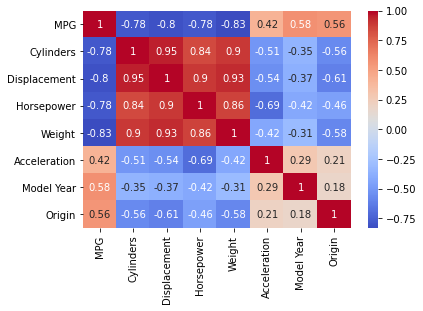

In [ ]:
# 相関係数のヒートマップ
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')